In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('train_housing.csv', usecols = ['GarageQual', 'FireplaceQu', 'SalePrice'])

In [8]:
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [9]:
df.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

[]

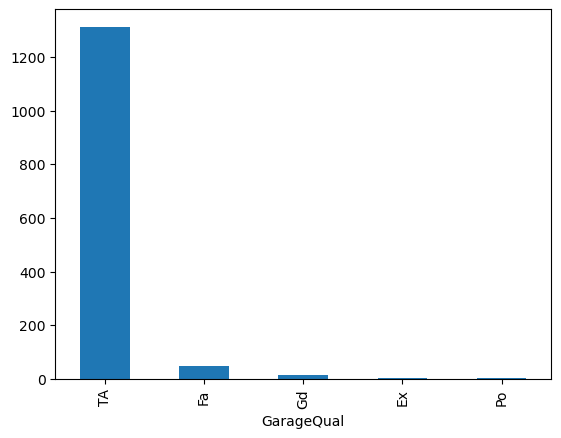

In [11]:
df['GarageQual'].value_counts().sort_values(ascending = False).plot.bar()
plt.plot()

In [12]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

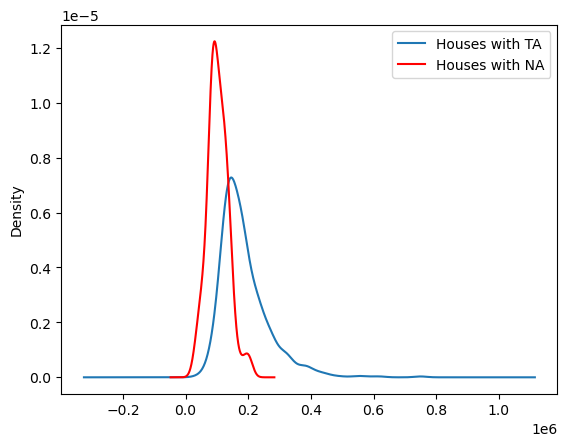

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind = 'kde', ax = ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind = 'kde', ax = ax, color = 'red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc = 'best')

plt.show()

In [14]:
temp = df[df['GarageQual'] == 'TA']['SalePrice']

In [15]:
df['GarageQual'].fillna('TA', inplace = True)

<Axes: xlabel='GarageQual'>

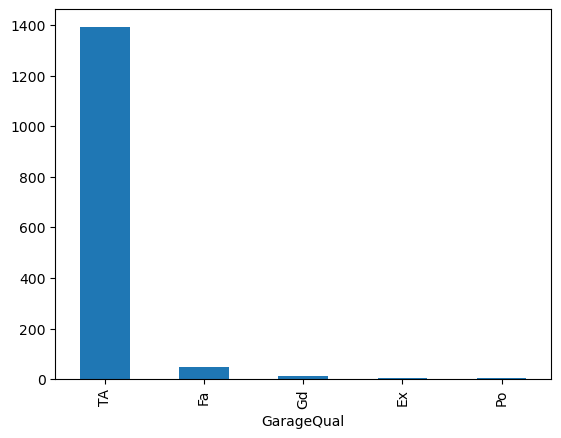

In [16]:
df['GarageQual'].value_counts().plot.bar()

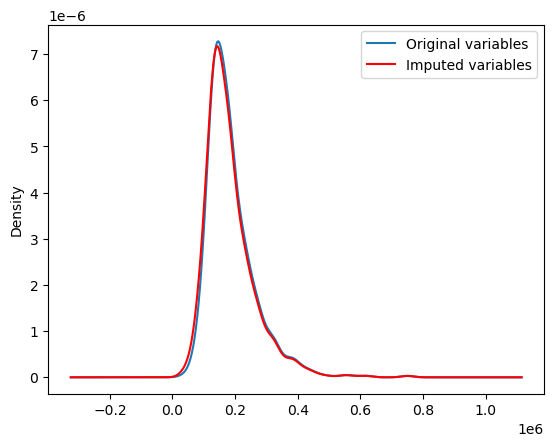

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind = 'kde', ax = ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind = 'kde', ax = ax, color = 'red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variables', 'Imputed variables']
ax.legend(lines, labels, loc = 'best')

plt.show()

<Axes: xlabel='FireplaceQu'>

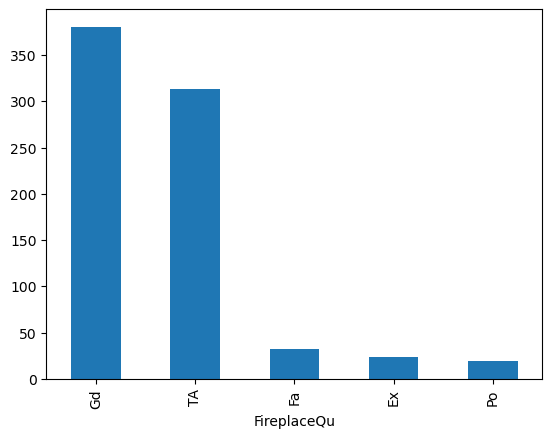

In [19]:
df['FireplaceQu'].value_counts().plot.bar()

In [20]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

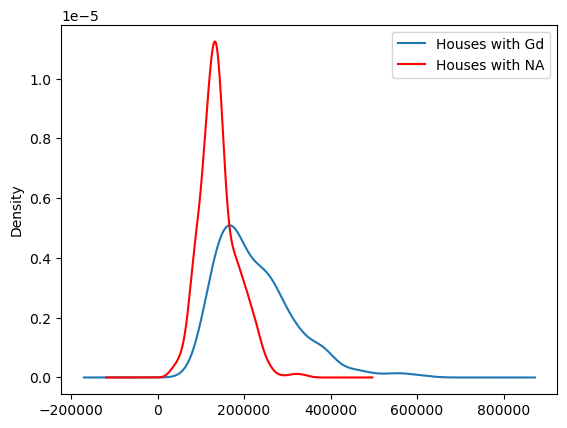

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind = 'kde', ax = ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind = 'kde', ax = ax, color = 'red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc = 'best')

plt.show()

In [22]:
temp = df[df['FireplaceQu'] == 'Gd']['SalePrice']

In [23]:
df['FireplaceQu'].fillna('Gd', inplace = True)

<Axes: xlabel='FireplaceQu'>

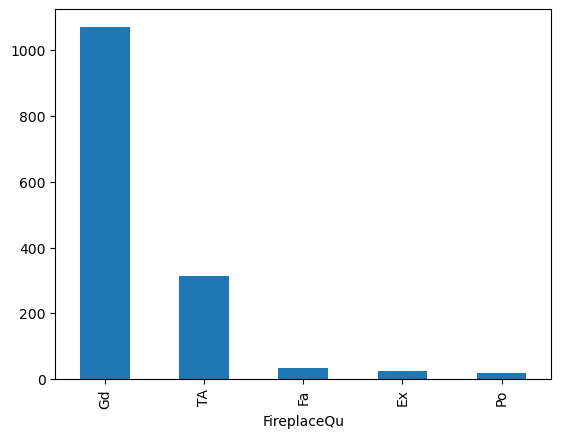

In [24]:
df['FireplaceQu'].value_counts().plot.bar()

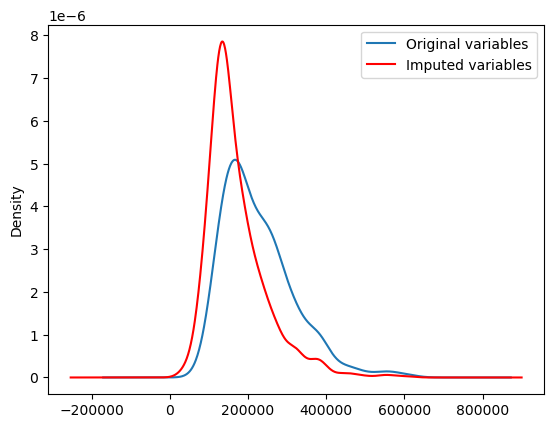

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind = 'kde', ax = ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind = 'kde', ax = ax, color = 'red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variables', 'Imputed variables']
ax.legend(lines, labels, loc = 'best')

plt.show()

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['SalePrice']), df['SalePrice'], test_size = 0.2)

In [27]:
from sklearn.impute import SimpleImputer

In [28]:
imputer = SimpleImputer(strategy = 'most_frequent')

In [30]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

In [31]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

* If the value is missing > 10%, then we can also crete a new missing category for the missing values.
* The process are same to create the missing category like above where all the missing values are filled with the name 'missing'